In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import mglearn
import IPython.display as display
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
    #리프노드가 순수노드가 될 때까지 반복, 훈련 정확도가 100%이라는 건 과대적합을 의미한다. 이상치 하나에 민감하게 반응하는 모델이라 일반화에 어렵다

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [4]:
#p.106 결정 트리의 복잡도 제어하기
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))   #1.000 에서 낮아졌지만
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))    #테스트 세트 스코어는 높아졌다

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [11]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='tree.png')
display.display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tpng', '-O', 'tree.png'], make sure the Graphviz executables are on your systems' PATH

In [56]:
print("특성 중요도:\n", tree.feature_importances_, '\n')
for name, val in zip(cancer.feature_names, tree.feature_importances_):
    print("{:>25}: {}".format(name, val))

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ] 

              mean radius: 0.0
             mean texture: 0.0
           mean perimeter: 0.0
                mean area: 0.0
          mean smoothness: 0.0
         mean compactness: 0.0
           mean concavity: 0.0
      mean concave points: 0.0
            mean symmetry: 0.0
   mean fractal dimension: 0.0
             radius error: 0.010197368202069328
            texture error: 0.0483982536186494
          perimeter error: 0.0
               area error: 0.0
         smoothness error: 0.002415595085315826
        compactness error: 0.0
          concavity error: 0.0
     concave points error: 0.0
           symmetry error: 0.0
  fractal dimension error: 0.0
        

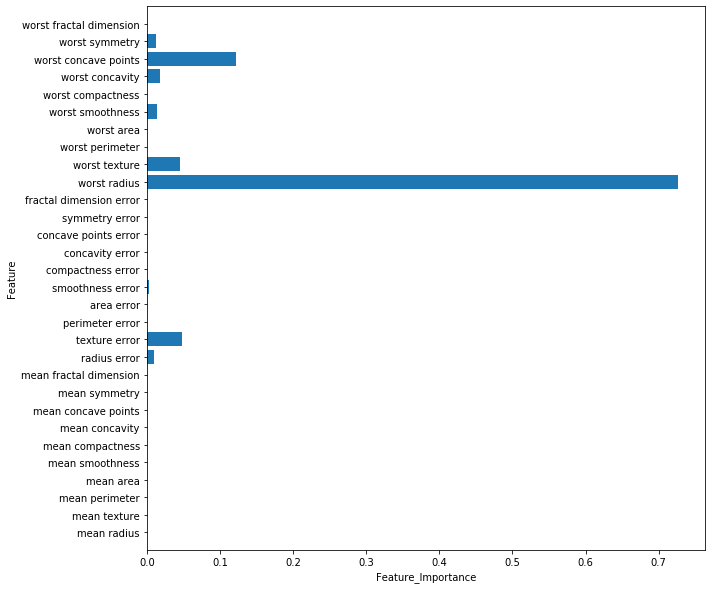

In [12]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10, 10))   #표의 사이즈 바꾸기
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature_Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


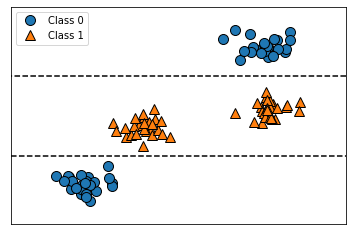

In [62]:
tree = mglearn.plots.plot_tree_not_monotone()


In [41]:
#p122 트리 기반 회귀 모델은 외삽(extrapolation), 즉 훈련 데이터의 범위 밖의 포인트에 대해서 예측할 수 없다.
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.yticks(fontname="Arial")
print(ram_prices)
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price ($/Mbyte)')

In [47]:
#DecisionTreeRegressor 과 LinearRegression을 이용하여 2000년 전 데이터로부터 2000년 이후 데이터 예측하기
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#가격 예측을 위해 "Unnamed" col은 빼고 날짜 특성만 이용합니다
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

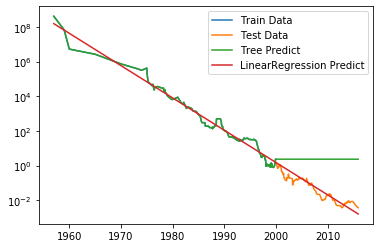

In [48]:
plt.semilogy(data_train.date, data_train.price, label='Train Data')
plt.semilogy(data_test.date, data_test.price, label='Test Data')
plt.semilogy(ram_prices.date, price_tree, label='Tree Predict')
plt.semilogy(ram_prices.date, price_lr, label='LinearRegression Predict')
plt.legend()